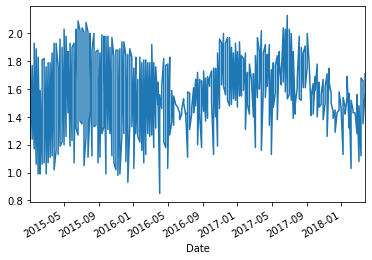

In [3]:
import pandas as pd

df = pd.read_csv('avocado.csv')
#if there is a date column, it is better to convert it into a date first as pandas does realize it is a date format.
df['Date'] = pd.to_datetime(df['Date'])
albany_df = df[df['region'] == 'Albany']
albany_df.set_index('Date', inplace = True)
albany_df['AveragePrice'].plot()

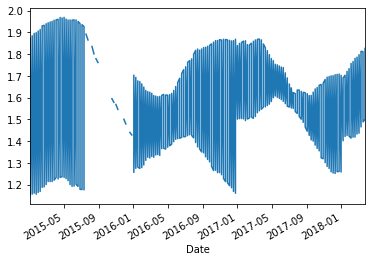

In [4]:
#using rolling average

albany_df['AveragePrice'].rolling(25).mean().plot()

In [5]:
#because the dates are not sorted
albany_df.index

DatetimeIndex(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
               '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
               '2015-11-01', '2015-10-25',
               ...
               '2018-03-11', '2018-03-04', '2018-02-25', '2018-02-18',
               '2018-02-11', '2018-02-04', '2018-01-28', '2018-01-21',
               '2018-01-14', '2018-01-07'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

In [6]:
#getting the dates in proper order
#waring is okay
albany_df.sort_index(inplace=True)

C:\Users\ajay1\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


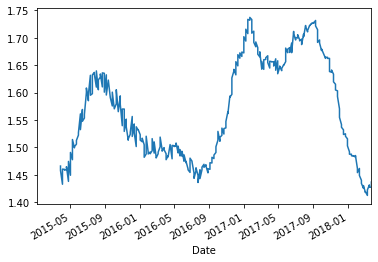

In [7]:
albany_df['AveragePrice'].rolling(25).mean().plot()

In [8]:
#this column has good data, so i'm gonna take this values as keep it as a column in my data frame.
#to do that, i create a new column and assign these values

albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

C:\Users\ajay1\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
albany_df.dropna().head() #remove the rows with na values 

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-03-29,39,1.93,1082.44,24.75,173.26,0.00,884.43,884.43,0.00,0.00,organic,2015,Albany,1.4660
2015-03-29,39,1.02,67799.08,1402.28,58623.22,89.50,7684.08,7208.49,475.59,0.00,conventional,2015,Albany,1.4580
2015-04-05,38,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany,1.4328
2015-04-05,38,1.93,1526.10,15.75,202.52,0.00,1307.83,1307.83,0.00,0.00,organic,2015,Albany,1.4604
2015-04-12,37,1.76,1634.59,51.75,93.38,0.00,1489.46,1489.46,0.00,0.00,organic,2015,Albany,1.4600


In [13]:
#the warnings appears because we are taking the slice of the data frame, since here we are not referening the original data frame,
#we should be good

albany_df = df.copy()[df['region'] == 'Albany']
albany_df.set_index('Date', inplace = True)
albany_df.sort_index(inplace=True)
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

In [18]:
#graph all the regions and see them compared

list(set(df['region'].values.tolist())) 

['Midsouth',
 'Plains',
 'Atlanta',
 'NewOrleansMobile',
 'WestTexNewMexico',
 'Syracuse',
 'MiamiFtLauderdale',
 'California',
 'NewYork',
 'HartfordSpringfield',
 'Boston',
 'NorthernNewEngland',
 'SouthCentral',
 'Tampa',
 'HarrisburgScranton',
 'Jacksonville',
 'Louisville',
 'Boise',
 'RichmondNorfolk',
 'SanDiego',
 'Seattle',
 'BuffaloRochester',
 'Orlando',
 'Houston',
 'SanFrancisco',
 'RaleighGreensboro',
 'Albany',
 'Spokane',
 'West',
 'Detroit',
 'Chicago',
 'GrandRapids',
 'Denver',
 'Charlotte',
 'LasVegas',
 'Pittsburgh',
 'StLouis',
 'Nashville',
 'Indianapolis',
 'PhoenixTucson',
 'TotalUS',
 'Portland',
 'DallasFtWorth',
 'Southeast',
 'Roanoke',
 'Columbus',
 'Philadelphia',
 'SouthCarolina',
 'BaltimoreWashington',
 'GreatLakes',
 'LosAngeles',
 'CincinnatiDayton',
 'Northeast',
 'Sacramento']

In [19]:
#the previous approach was messy - a lot of times there are easier ways to do things in pandas
#use pandas docs - built is c++

df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [21]:
#create a new dateframe with index as date and columns of all the regions with 25 moving average as their values

graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [24]:
#why did it slow down in the end?
#it is because of the type  - there are conflicting dates so the join method does not know where to join

df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [25]:
graph_df.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,Columbus_price25ma,DallasFtWorth_price25ma,Denver_price25ma,Detroit_price25ma,GrandRapids_price25ma,GreatLakes_price25ma
Date,,,,,,,,,,,,,,,,
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1492,1.3264,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2788


In [28]:
#initially chose either conventinal or organic 

import pandas as pd

df = pd.read_csv('avocado.csv')
df = df.copy()[df['type'] == 'organic']
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [30]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
        
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        
graph_df.tail()

California
LasVegas
PhoenixTucson
BuffaloRochester
Spokane
LosAngeles
Philadelphia
Boston
StLouis
Louisville
Orlando
Southeast
Boise
MiamiFtLauderdale
NorthernNewEngland
BaltimoreWashington
Midsouth
Tampa
West
Northeast
Atlanta
Nashville
TotalUS
Syracuse
WestTexNewMexico
Jacksonville
Charlotte
Sacramento
GrandRapids
Roanoke
Denver
SanDiego
GreatLakes
RichmondNorfolk
DallasFtWorth
SanFrancisco
HarrisburgScranton
Pittsburgh
RaleighGreensboro
Seattle
HartfordSpringfield
Portland
CincinnatiDayton
SouthCarolina
Houston
Chicago
Plains
Indianapolis
SouthCentral
Columbus
Albany
Detroit
NewOrleansMobile
NewYork


,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


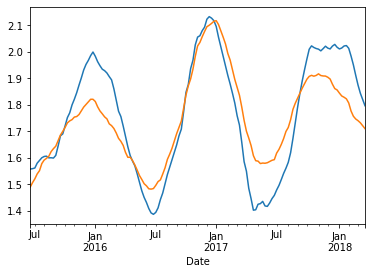

In [40]:
#better graphs can be done using matplotlib

graph_df[['LasVegas_price25ma', 'PhoenixTucson_price25ma']].dropna().plot(legend=False)

In [42]:
gb = df.groupby('region')
gb.get_group('Albany')

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9177,51,2015-01-04,1.79,1373.95,57.42,153.88,0.0,1162.65,1162.65,0.00,0.0,organic,2015,Albany
9176,50,2015-01-11,1.77,1182.56,39.00,305.12,0.0,838.44,838.44,0.00,0.0,organic,2015,Albany
9175,49,2015-01-18,1.93,1118.47,8.02,178.78,0.0,931.67,931.67,0.00,0.0,organic,2015,Albany
9174,48,2015-01-25,1.89,1115.89,14.87,148.72,0.0,952.30,952.30,0.00,0.0,organic,2015,Albany
9173,47,2015-02-01,1.83,1228.51,33.12,99.36,0.0,1096.03,1096.03,0.00,0.0,organic,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17605,4,2018-02-25,1.56,5356.63,816.56,532.59,0.0,4007.48,4007.48,0.00,0.0,organic,2018,Albany
17604,3,2018-03-04,1.48,3851.30,311.55,296.77,0.0,3242.98,3239.65,3.33,0.0,organic,2018,Albany
17603,2,2018-03-11,1.68,2570.52,131.67,229.56,0.0,2209.29,2209.29,0.00,0.0,organic,2018,Albany
17602,1,2018-03-18,1.66,3154.45,275.89,297.96,0.0,2580.60,2577.27,3.33,0.0,organic,2018,Albany


In [57]:
graph_df_2 = pd.DataFrame()

for name, group in df.groupby('region'):
    region_df = group.copy()[group['region'] == name]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f'{name}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df_2.empty:
        graph_df_2 = region_df[[f'{name}_price25ma']]
        
    else:
        graph_df_2 = graph_df_2.join(region_df[f'{name}_price25ma'])

graph_df_2.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,...,SouthCarolina_price25ma,SouthCentral_price25ma,Southeast_price25ma,Spokane_price25ma,StLouis_price25ma,Syracuse_price25ma,Tampa_price25ma,TotalUS_price25ma,West_price25ma,WestTexNewMexico_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.5112,1.8660,1.5836,2.0512,1.7636,1.2912,1.9128,2.0548,1.8160,1.7752,...,1.6184,1.5728,1.7116,2.1544,1.9240,1.3156,1.7204,1.7144,1.8620,1.8708
2018-03-04,1.4992,1.8288,1.5772,2.0176,1.7708,1.2744,1.8876,2.0180,1.8024,1.7564,...,1.5952,1.5592,1.6868,2.1040,1.8868,1.3004,1.7104,1.6940,1.8220,1.8372
2018-03-11,1.5044,1.7844,1.5732,1.9836,1.7824,1.2652,1.8636,1.9764,1.7836,1.7216,...,1.5612,1.5400,1.6484,2.0552,1.8468,1.2932,1.6916,1.6748,1.7912,1.8052
2018-03-18,1.5140,1.7412,1.5684,1.9520,1.7932,1.2560,1.8516,1.9444,1.7732,1.6860,...,1.5312,1.5204,1.6156,2.0012,1.8192,1.2848,1.6776,1.6588,1.7644,1.7772
2018-03-25,1.5188,1.6936,1.5568,1.9128,1.7984,1.2416,1.8364,1.9024,1.7672,1.6720,...,1.5004,1.5072,1.5820,1.9496,1.7976,1.2700,1.6484,1.6428,1.7304,1.7472


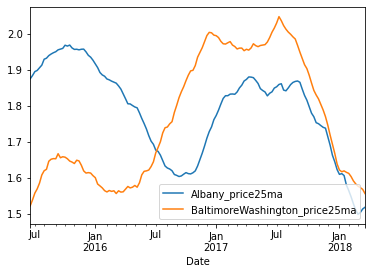

In [59]:
graph_df_2[['Albany_price25ma','BaltimoreWashington_price25ma']].dropna().plot()